#### 연령별 인구현황 데이터 셋
- https://jumin.mois.go.kr/ageStatMonth.do
- 남여구분, 5세단위, 100세이상

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "Apple SD Gothic Neo"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
# warnings : 함수를 현재는 지원하는 나중에 삭제 시 경고 메세지가 발생
import warnings
warnings.simplefilter("ignore") # 무시할게

#### 남, 여 데이터프레임 생성

In [10]:
# 원본 데이터 남자 데이터 가져오기

df_man = pd.read_excel("./data/202306_202306_연령별인구현황_월간.xlsx",skiprows=3,usecols="B,E:Y")
df_man.head(3)

,행정기관,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
0,전국,"706,625","1,052,112","1,205,210","1,202,795","1,490,016","1,805,935","1,767,267","1,654,974","2,060,002",...,"2,049,129","2,122,654","1,591,968","1,051,593","730,834","517,546","220,922","56,592","9,135","1,520"
1,서울특별시,"113,314","157,840","184,094","195,604","267,118","388,073","386,717","326,992","364,597",...,"336,153","344,878","275,917","189,812","139,076","96,104","38,116","9,813","1,745",330
2,부산광역시,"39,970","62,965","68,934","66,965","91,216","107,505","105,069","97,652","127,323",...,"125,435","143,107","121,110","84,688","57,025","38,158","14,067","3,206",449,77


In [11]:
df_man = pd.read_excel("./data/202306_202306_연령별인구현황_월간.xlsx",skiprows=3,usecols="B,E:Y",index_col="행정기관")
df_man.head(3)

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"706,625","1,052,112","1,205,210","1,202,795","1,490,016","1,805,935","1,767,267","1,654,974","2,060,002","2,003,993",...,"2,049,129","2,122,654","1,591,968","1,051,593","730,834","517,546","220,922","56,592","9,135","1,520"
서울특별시,"113,314","157,840","184,094","195,604","267,118","388,073","386,717","326,992","364,597","344,645",...,"336,153","344,878","275,917","189,812","139,076","96,104","38,116","9,813","1,745",330
부산광역시,"39,970","62,965","68,934","66,965","91,216","107,505","105,069","97,652","127,323","119,958",...,"125,435","143,107","121,110","84,688","57,025","38,158","14,067","3,206",449,77


In [12]:
df_woman = pd.read_excel("./data/202306_202306_연령별인구현황_월간.xlsx",skiprows=3,usecols="B,AB:AV",index_col="행정기관")
df_woman.head(3)

,0~4세.1,5~9세.1,10~14세.1,15~19세.1,20~24세.1,25~29세.1,30~34세.1,35~39세.1,40~44세.1,45~49세.1,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"671,918","1,001,255","1,140,109","1,127,886","1,372,894","1,633,056","1,600,066","1,566,245","1,988,569","1,945,511",...,"2,022,964","2,153,887","1,685,373","1,190,669","921,394","810,091","473,297","182,805","41,327","7,516"
서울특별시,"106,557","150,890","174,431","188,477","301,831","419,021","385,079","328,070","370,355","353,854",...,"351,170","375,865","315,840","223,402","173,640","129,786","68,429","25,956","6,355","1,165"
부산광역시,"38,152","59,540","65,418","63,454","86,644","101,193","97,347","93,724","124,332","118,194",...,"134,729","159,856","136,522","100,859","71,847","57,545","29,455","10,624","2,495",384


#### 데이터 탐색

In [13]:
# 전체 컬럼명, 데이터 타입 확인

df_man.info()   # 엑셀 자체에서 데이터가 숫자로 보여지지만 일반데이터라서 object 타입임 -> 숫자데이터로 사용하려면 숫자 타입으로 바꿔야 함

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   0~4세     18 non-null     object
 1   5~9세     18 non-null     object
 2   10~14세   18 non-null     object
 3   15~19세   18 non-null     object
 4   20~24세   18 non-null     object
 5   25~29세   18 non-null     object
 6   30~34세   18 non-null     object
 7   35~39세   18 non-null     object
 8   40~44세   18 non-null     object
 9   45~49세   18 non-null     object
 10  50~54세   18 non-null     object
 11  55~59세   18 non-null     object
 12  60~64세   18 non-null     object
 13  65~69세   18 non-null     object
 14  70~74세   18 non-null     object
 15  75~79세   18 non-null     object
 16  80~84세   18 non-null     object
 17  85~89세   18 non-null     object
 18  90~94세   18 non-null     object
 19  95~99세   18 non-null     object
 20  100세 이상  18 non-null     object
dtypes: object(21)
memory usage: 3.1+ KB


In [14]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   0~4세.1     18 non-null     object
 1   5~9세.1     18 non-null     object
 2   10~14세.1   18 non-null     object
 3   15~19세.1   18 non-null     object
 4   20~24세.1   18 non-null     object
 5   25~29세.1   18 non-null     object
 6   30~34세.1   18 non-null     object
 7   35~39세.1   18 non-null     object
 8   40~44세.1   18 non-null     object
 9   45~49세.1   18 non-null     object
 10  50~54세.1   18 non-null     object
 11  55~59세.1   18 non-null     object
 12  60~64세.1   18 non-null     object
 13  65~69세.1   18 non-null     object
 14  70~74세.1   18 non-null     object
 15  75~79세.1   18 non-null     object
 16  80~84세.1   18 non-null     object
 17  85~89세.1   18 non-null     object
 18  90~94세.1   18 non-null     object
 19  95~99세.1   18 non-null     object
 20  100세 이상.1  18 non-null     ob

#### 데이터 전처리
    - 수치 데이터 object => int64 변경( df.astype(), pd.to_numeric() )

In [26]:
import numpy as np

df = pd.DataFrame({
    "name":["홍길동","김수정","이민정"],
    "age":["25",np.nan,"45"]
})
df

,name,age
0,홍길동,25
1,김수정,NaN
2,이민정,45


In [27]:
df.dtypes

name    object
age     object
dtype: object

In [ ]:
# astype() : 숫자에 ,(콤마)가 없어야 함 / NaN 없어야 함

# df["age1"] = df["age"].astype("int64")  # ValueError: cannot convert float NaN to integer : NaN이 있으면 float64임

In [30]:
# , 제거 후 astype()
# replace(",","")

df_man["0~4세"].str.replace(",","").astype("int64")

행정기관
전국           706625
서울특별시        113314
부산광역시         39970
대구광역시         30306
인천광역시         42977
광주광역시         20688
대전광역시         20908
울산광역시         16069
세종특별자치시        9210
경기도          212321
강원특별자치도       20262
충청북도          22050
충청남도          30179
전라북도          20479
전라남도          22871
경상북도          32271
경상남도          42184
제주특별자치도       10566
Name: 0~4세, dtype: int64

In [31]:
# 모든 컬럼에 , 를 제거하고 데이터 타입 변경해야 함 => 함수 작성

df_man = df_man.apply(lambda x:x.str.replace(",","").astype("int64"))
df_woman = df_woman.apply(lambda x:x.str.replace(",","").astype("int64"))

In [32]:
df_man.dtypes

0~4세       int64
5~9세       int64
10~14세     int64
15~19세     int64
20~24세     int64
25~29세     int64
30~34세     int64
35~39세     int64
40~44세     int64
45~49세     int64
50~54세     int64
55~59세     int64
60~64세     int64
65~69세     int64
70~74세     int64
75~79세     int64
80~84세     int64
85~89세     int64
90~94세     int64
95~99세     int64
100세 이상    int64
dtype: object

- 남자, 여자 컬럼명 통일

In [33]:
df_man.columns

Index(['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세',
       '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세',
       '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상'],
      dtype='object')

In [36]:
df_woman.columns

Index(['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세',
       '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세',
       '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상'],
      dtype='object')

In [35]:
# df_woman.columns = ['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세',
#        '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세',
#        '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상']

df_woman.columns = df_man.columns   # 컬럼명이 일치할때 이렇게 해 볼수있음

In [38]:
df_man.iloc[0]

0~4세        706625
5~9세       1052112
10~14세     1205210
15~19세     1202795
20~24세     1490016
25~29세     1805935
30~34세     1767267
35~39세     1654974
40~44세     2060002
45~49세     2003993
50~54세     2306422
55~59세     2049129
60~64세     2122654
65~69세     1591968
70~74세     1051593
75~79세      730834
80~84세      517546
85~89세      220922
90~94세       56592
95~99세        9135
100세 이상       1520
Name: 전국  , dtype: int64

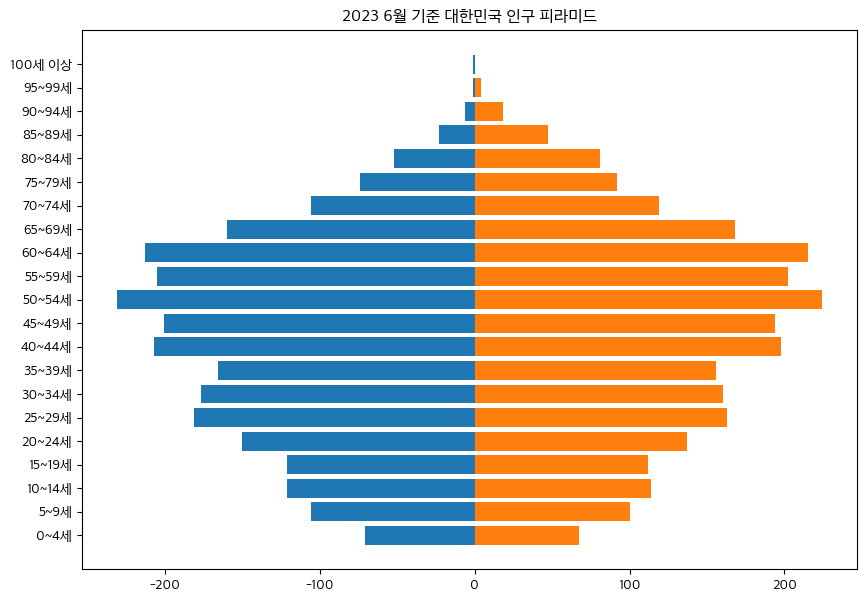

In [40]:
plt.figure(figsize=(10,7))
plt.barh(y=df_man.columns,width=-df_man.iloc[0] // 10000)
plt.barh(y=df_woman.columns,width=df_woman.iloc[0] // 10000)
plt.title("2023 6월 기준 대한민국 인구 피라미드")
plt.savefig("202306_인구피라미드.png")
plt.show()